#**Importing Dependencies :**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from sklearn.preprocessing import OneHotEncoder


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from scipy import stats
import statsmodels.api as sm
import math
import re

from scipy import sparse

from sklearn.linear_model import LogisticRegression

import xgboost
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn import preprocessing
from tqdm.notebook import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error



In [ ]:
#!pip install scikit-optimize
#!pip install lightgbm

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading Dataset
df = pd.read_csv('/content/drive/MyDrive/Projects/Feedback/train.csv')

In [ ]:
#df = pd.read_csv('E:\Feedback/train.csv')
#defining a function for encoding the class labels in "discourse_effectiveness"
def label_encode(x):
    if x == 'Adequate':
        return 0
    elif x == 'Effective':
        return 1
    else:
        return 2

In [ ]:
df['label'] = df['discourse_effectiveness'].apply(label_encode)
Adequate = df[df['label']==0]
Effective = df[df['label']==1]
Ineffective = df[df['label']==2]

In [ ]:
print(Adequate.shape, Effective.shape, Ineffective.shape)

(20977, 6) (9326, 6) (6462, 6)


In [ ]:
df.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,label
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,0
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate,0
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate,0
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate,0
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate,0


In [ ]:
df = df.drop(['discourse_id', 'essay_id', 'discourse_effectiveness'], axis = 1 )

In [ ]:
df.head()

,discourse_text,discourse_type,label
0,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,0
1,"On my perspective, I think that the face is a ...",Position,0
2,I think that the face is a natural landform be...,Claim,0
3,"If life was on Mars, we would know by now. The...",Evidence,0
4,People thought that the face was formed by ali...,Counterclaim,0


In [ ]:
X = df
y = df['label']

#**Undersampling the dataset**

In [ ]:
from imblearn import under_sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 42)
X_resampled, y_resampled = rus.fit_resample(X,y)
#print(sorted(Counter(y_resampled).items()), y_resampled.shape)


In [ ]:
x = pd.DataFrame(X_resampled)
x.to_csv('x_train.csv')

In [ ]:
x

,discourse_text,discourse_type,label
0,And can make students and their learning envir...,Evidence,0
1,I think that luke did the right thing by sayin...,Claim,0
2,We can't text and drive,Position,0
3,Sense the rules changed and we are no longer a...,Evidence,0
4,One example that tells you why it isnt an alie...,Evidence,0
...,...,...,...
19381,Here are 2 of the reasons I think that the per...,Position,2
19382,when are you take the video online you dont ha...,Claim,2
19383,Conclusion: you dont are prepared for take the...,Concluding Statement,2
19384,someone can use everything that many people sa...,Evidence,2


In [ ]:
y = y_resampled

In [ ]:
#Using Word Lemmatizer
nltk.download('omw-1.4')

wordnet = WordNetLemmatizer()

def clean(text):
    text="".join([re.sub('[^a-zA-Z]',' ',char) for char in text])
    text=text.lower()
    text=text.split()
    text=[wordnet.lemmatize(word) for word in text if word not in set(stopwords.words("english"))]
    text=" ".join(text)
    return text

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
#Defining a function to preprocess both train and test data.
def data_preprocess(f):
  df = pd.read_csv(f)
  df = df.fillna('')
  df['discourse_text'] = df['discourse_text'].apply(clean)
  X = df['discourse_text'].values
  return X

In [ ]:
X_train = data_preprocess('/content/drive/MyDrive/Projects/Feedback/train.csv')
X_test = data_preprocess('/content/drive/MyDrive/Projects/Feedback/test.csv')

In [ ]:
m = pd.DataFrame(X_train)

n = pd.DataFrame(X_test)

In [ ]:
m

,0
0,hi isaac going writing face mar natural landfo...
1,perspective think face natural landform dont t...
2,think face natural landform life mar descovere...
3,life mar would know reason think natural landf...
4,people thought face formed alieans thought lif...
...,...
36760,many people like asking one person advice some...
36761,also people different view opinion thing
36762,advice something impact person view many way h...
36763,someone use everything many people said use he...


In [ ]:
n

,0
0,making choice life difficult people often ask ...
1,seeking multiple opinion help person make bett...
2,decrease stress level
3,great chance learn something new
4,helpful beneficial
5,making decision chance become stressed overwhe...
6,everyone different may experience seeking peop...
7,seeking others opinion helpful beneficial
8,taking people advice say may lead great outcom...
9,learn others experience seeking advice someone...


In [ ]:
X = np.concatenate((X_train,X_test))
X.shape

(36775,)

In [ ]:
#df.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,label
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,0
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate,0
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate,0
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate,0
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate,0


In [ ]:
 #y = df['label']


In [ ]:
y = y.values


In [ ]:
#Converting the textual data into numerical data using vertorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

### Converting the Discourse type categorical variables

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Projects/Feedback/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Projects/Feedback/test.csv')

In [ ]:
category_train = set(df_train.discourse_type)
print(category_train)
category = set(df_test.discourse_type)
print(category)

{'Evidence', 'Lead', 'Concluding Statement', 'Rebuttal', 'Claim', 'Counterclaim', 'Position'}
{'Evidence', 'Lead', 'Concluding Statement', 'Claim', 'Position'}


In [ ]:
X_type_train = pd.get_dummies(df_train.discourse_type)
X_type_test = pd.get_dummies(df_test.discourse_type)

In [ ]:
X_type_test['Rebuttal'] = 0
X_type_test['Counterclaim'] = 0


In [ ]:
X_type = pd.concat((X_type_train, X_type_test), axis = 0)


In [ ]:
#Dropping the "Rebuttal" dummy variable
X_type = X_type.drop(['Rebuttal'], axis = 'columns')

In [ ]:
X_type.index.is_unique


False

In [ ]:
X_type = X_type.reset_index()


In [ ]:
X_mod = sparse.hstack((X,X_type))

TypeError: no supported conversion for types: (dtype('float64'), dtype('O'))

In [ ]:
#L = len()
X = X_mod.tocsr()[:19386]

In [ ]:
#le = preprocessing.LabelEncoder()
#y_type = df['discourse_effectiveness']
#le.fit(list(set(y_type)))
#df['y_trans'] = le.transform(df['discourse_effectiveness'])
#y = df['y_trans'].values


# Training :

## XGBoost :

In [ ]:
model_xgboost = xgboost.XGBClassifier(n_estimators = 100,
                                     eval_metric = 'logloss')

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


In [ ]:
score = cross_val_score(model_xgboost, X, y, cv =kfold, error_score='raise', scoring='neg_log_loss')

In [ ]:
print("The mean validaiton score on 10 fold CV is : {:.4f}\nThe standard deviation of the spread is : {:.4f} "
      .format(score.mean(),score.std()))


The mean validaiton score on 10 fold CV is : -0.0006
The standard deviation of the spread is : 0.0015 


In [ ]:
#Checking Accuracy
model_xgboost = xgboost.XGBClassifier(n_estimators = 100,
                                     eval_metric = 'auc')
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
score = cross_val_score(model_xgboost, X, y, cv =kfold, error_score='raise')
print("The mean validaiton score on 10 fold CV is : {:.4f}\nThe standard deviation of the spread is : {:.4f} "
      .format(score.mean(),score.std()))

The mean validaiton score on 10 fold CV is : 0.9999
The standard deviation of the spread is : 0.0002 


In [ ]:
#Creating the train test split of each fold and storing the MAE values accordingly in an array.
skf = StratifiedKFold(n_splits=10)
from sklearn.metrics import log_loss
mae_train = []
mae_test = []
acc_train = []
acc_test = []
for train_index, test_index in tqdm(skf.split(X,y)):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  # X_train, X_test = X.iloc[train_index].to_numpy(), X.iloc[test_index].to_numpy()
  # y_train, y_test = y.iloc[train_index].to_numpy().ravel(), y.iloc[test_index].to_numpy().ravel()
  model = xgboost.XGBClassifier(n_estimators = 100,
                                    eval_metric = 'auc')
  model.fit(X_train, y_train)
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  acc_train.append(model.score(X_train,y_train))
  acc_test.append(model.score(X_test,y_test))
  mae_train.append(mean_absolute_error(y_train, y_train_pred))
  mae_test.append(mean_absolute_error(y_test, y_test_pred))


0it [00:00, ?it/s]

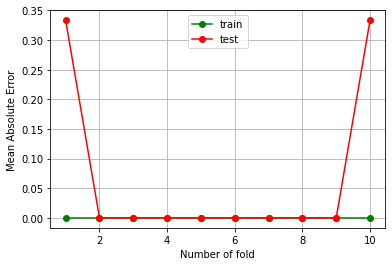

In [ ]:
#Plotting the scores with MAE to check for overfitting
folds = range(1, skf.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag_model = BaggingClassifier( base_estimator =model_xgboost, n_estimators = 100,
                              max_samples = 0.7, oob_score = True, random_state =42 )

In [ ]:
score = cross_val_score(bag_model, X, y, cv =kfold, error_score='raise', scoring='neg_log_loss')

In [ ]:
print("The mean validaiton score on 10 fold CV after bagging is : {:.4f}\nThe standard deviation of the spread is : {:.4f} "
      .format(score.mean(),score.std()))


## LightGBM :

In [ ]:
import lightgbm as lgbm

In [ ]:
clf = lgbm.LGBMClassifier(objective="multiclass", metric = 'multi_logloss', n_estimators = 100, random_state = 42, boosting_type = 'gbdt')

In [ ]:
skf = StratifiedKFold(n_splits=10)
score_lgbm = cross_val_score(clf, X, y, cv =skf, scoring='neg_log_loss')

In [ ]:
print("The mean validaiton score on 10 fold CV using LightGBM : {:.4f} \nThe standard deviation of the spread is : {:.4f}"
      .format(score_lgbm.mean(),score_lgbm.std()))

The mean validaiton score on 10 fold CV using LightGBM : -0.1221 
The standard deviation of the spread is : 0.1968


## AdaBoost :

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
AdaBoostClassifier().get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [ ]:
tree = DecisionTreeClassifier(criterion = 'gini',
                              random_state = 42,
                              )

In [ ]:
boost = AdaBoostClassifier(base_estimator = tree,
                           n_estimators = 100,
                           algorithm = 'SAMME.R',
                           random_state = 42)


In [ ]:
score_ada = cross_val_score(boost, X, y, cv =10, error_score='raise', scoring='neg_log_loss')

In [ ]:
print("The mean validaiton score on 10 fold CV : {:.4f} \nThe standard deviation of the spread is : {:.4f}"
      .format(score_ada.mean(),score_ada.std()))

The mean validaiton score on 10 fold CV : -2.3020 
The standard deviation of the spread is : 4.6040


## BERT:

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Tokenizing the text
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

# Preparing the dataset
train_encodings = tokenizer(df['discourse_text'].tolist(), truncation=True, padding=True)
train_labels = df['label'].tolist()

# Defining the training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_encodings,
    eval_dataset=train_encodings,
    compute_metrics=compute_metrics,
)

trainer.train()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.21.0`: Please run `pip install transformers[torch]` or `pip install accelerate -U`